In [23]:
## EDA in Python

In [24]:
pip install pandas matplotlib seaborn

In [25]:
## Import and Inspect

In [26]:
import pandas as pd

df = pd.read_csv("retail_sales_dataset.csv")
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [27]:
##Clean Data

In [28]:
df.info()
df.duplicated().sum()
df.isnull().sum()

df['Date'] = pd.to_datetime(df['Date'])  # Convert date


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [29]:
## Add Columns

In [30]:
df['Month'] = df['Date'].dt.to_period('M')
df['Age Group'] = pd.cut(df['Age'], bins=[17,25,35,45,55,65], 
                         labels=['18-25','26-35','36-45','46-55','56-65'])


In [31]:
##Save Clean Dataset

In [32]:
df.to_csv("cleaned_retail_sales.csv", index=False)


In [33]:
##Visualize with Python

C:\Users\AK\AppData\Local\Temp\ipykernel_5376\3431025667.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Group')['Total Amount'].sum().plot(kind='bar', title='Sales by Age Group')


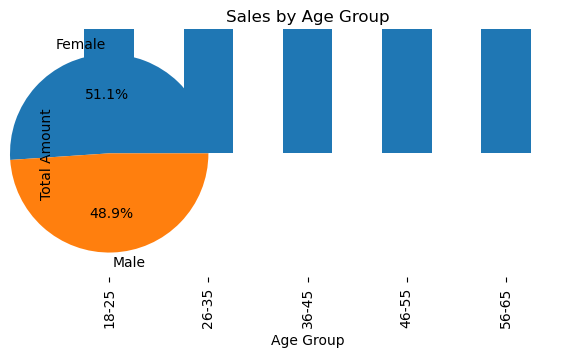

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Sales
monthly_sales = df.groupby('Month')['Total Amount'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales')

# Product Category
df.groupby('Product Category')['Total Amount'].sum().plot(kind='bar', title='Category Performance')

# Gender Sales
df.groupby('Gender')['Total Amount'].sum().plot(kind='pie', autopct='%1.1f%%', title='Gender Sales Share')

# Age Group
df.groupby('Age Group')['Total Amount'].sum().plot(kind='bar', title='Sales by Age Group')
plt.show()


In [35]:
# Save the cleaned data as a CSV
df.to_csv("cleaned_retail_sales.csv", index=False)
